### Student Name: Christian Clarke

In [3]:
#TODO: import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

### Step 1 - Load the data

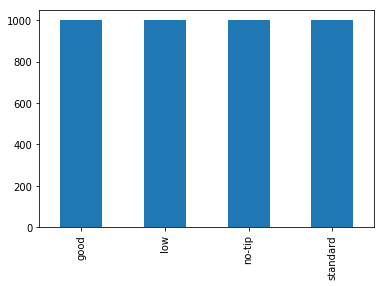

In [5]:
sample_size = 1000
#TODO: provide the file path or URL to the dataset `trip_data.csv`
file_path   = 'https://raw.githubusercontent.com/clarkech95/decision-trees-pt2/master/trip_data.csv' 

df = pd.read_csv(file_path)
df = df.groupby('tip').apply(lambda x: x.sample(sample_size))
df = df.sample(frac=1) #shuffle the dataframe rows

#visualize the sample data, which contain 1000 observations from each class
df.tip.value_counts().sort_index().plot.bar()

### Step 2: Create a new feature called `trip_duration`

In [22]:
#Create a new feature called trip_duration and add it to the dataframe

#TODO: Calculate the difference between `lpep_pickup_datetime` and `lpep_dropoff_datetime` in seconds (this should be a positive number).
#TODO: store the elapsed time (from above) into the dataframe.

df['trip_duration'] = (pd.to_datetime(df['lpep_dropoff_datetime']) - pd.to_datetime(df['lpep_pickup_datetime']))
df['trip_duration'] = df['trip_duration'].apply(lambda x: x.total_seconds())

#Remove the `lpep_pickup_datetime` and `lpep_dropoff_datetime` from the dataframe.
del df['lpep_dropoff_datetime']
del df['lpep_pickup_datetime']

### Step 3: Encode the labels in the `tip` field.
Use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) in scikit learn.

In [23]:
#Encode the class labels

#TODO: Initialize the `LabelEncoder`
le = LabelEncoder()

#TODO: Fit the `LabelEncoder` to the class labels in the 'tip' field
le.fit(pd.unique(df['tip']))

#TODO: Use the `LabelEncoder` to encode class labels in the 'tip' field.
df['tip'] = le.transform(df['tip'])

#TODO: Display the encoded labels
df['tip']

tip             
no-tip    127605    2
good      42876     0
no-tip    49939     2
standard  81621     3
          124547    3
no-tip    140047    2
low       121122    1
          136623    1
no-tip    84661     2
low       22218     1
good      113750    0
low       34043     1
          92755     1
good      21439     0
no-tip    25752     2
standard  6652      3
good      79378     0
standard  12703     3
          10658     3
          21291     3
low       4713      1
good      126486    0
low       114073    1
good      151567    0
low       72183     1
good      76003     0
low       61562     1
          57180     1
standard  108519    3
good      155692    0
                   ..
          3836      0
low       86482     1
good      124902    0
no-tip    793       2
good      134595    0
no-tip    42918     2
standard  90053     3
          149783    3
good      99610     0
low       79529     1
no-tip    618       2
good      143405    0
no-tip    18933     2
good      16940

In [24]:
#assign the input features and the class labels to variables 'X' and 'y' respectively.

X = df.iloc[:,np.r_[0:14,15]].to_numpy() #TODO: assign the input features (in the dataframe) to a variable 'X'.
y = df.iloc[:,14].tolist() #TODO: assign the encoded labels to a variale 'y'.

### Step 4: Feature selection

#### Filter Methods

[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection): use [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) to select the seven highest scoring features (i.e. k=7).

In [25]:
#Univariate feature selection using SelectKBest.

k_best   = SelectKBest(score_func= chi2 , #TODO choose either chi2 or f_classif
                     k= 7#TODO: enter the value for k
                    )

k_best   = k_best.fit(X, y)

features = k_best.transform(X)

#TODO: display the names of the selected features below

filter_one = [j for i, j in zip(k_best.get_support(), df.columns) if i == True]
filter_one

['PULocationID',
 'DOLocationID',
 'trip_distance',
 'fare_amount',
 'total_amount',
 'congestion_surcharge',
 'tip']

#### Wrapper methods

Identify the top seven features using [Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/svm.html) and [Recursive feature elimination (RFE)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE).

Here is an example on using [SVMs for classification](https://scikit-learn.org/stable/modules/svm.html#classification) and [RFE](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py) in scikit-learn.

In [26]:

svm_estimator = svm.SVC(kernel='linear') #initialize the SVM estimator

#TODO: Recursive Feature Elimination
rfe = RFE(estimator= svm_estimator, #TODO: provide the SVM estimator 
          verbose=1, 
          n_features_to_select= 7 #TODO: enter the number of required features
         )

rfe = rfe.fit(X, y) #Note: this may take a few minutes to complete

#TODO: display the names of the selected features below
wrapper_one = [j for i,j in zip(rfe.get_support(), df.columns) if i == True]
wrapper_one

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


['fare_amount',
 'extra',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'trip_type',
 'congestion_surcharge']

#### The results
Compare and contrast the selected features from the filter and wrapper methods. 

They both produced compelling results however, I feel the attributes decided by the filter method are better suited to this problem than the wrapper method's. Interestingly enough, they do share three of the same attributes, those being fare amount, total amount and congestion surchage. However, the wrapper method then proceeds to select several features which show little variance throughout our dataset so I'm curious as to why they are interpreted to have so much value.

In [ ]:
print(filter_one)
print(wrapper_one)

### Step 5: Standardize the input features
Use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) in [scikit-learn's preprocessing module](https://scikit-learn.org/stable/modules/preprocessing.html) to scale the input features between 0.1 and 0.9 (i.e. the min and max respectively). 

In [27]:
#Standardize the input features
#TODO: provide the min and max values for the features
scaler = MinMaxScaler(feature_range= (0.1,0.9)
                     )

X = scaler.fit_transform(X)

In [28]:
# TODO: Perform the SelectKBest and Recursive Feature Elimination steps using the standardized data
k_best_scaled = SelectKBest(score_func= chi2 , #TODO choose either chi2 or f_classif
                     k= 7#TODO: enter the value for k
                    )
k_best_scaled = k_best.fit(X, y)
rfe_scaled = RFE(estimator= svm_estimator, #TODO: provide the SVM estimator 
          verbose=1, 
          n_features_to_select= 7 #TODO: enter the number of required features
         )
rfe_scaled = rfe.fit(X, y)

#TODO: display the names of the selected features for each method
filter_scaled = [j for i, j in zip(k_best.get_support(), df.columns) if i == True]
wrapper_scaled = [j for i,j in zip(rfe.get_support(), df.columns) if i == True]
print(filter_scaled)
print(wrapper_scaled)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
['VendorID', 'PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount', 'extra', 'congestion_surcharge']
['RatecodeID', 'trip_distance', 'fare_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'tip']


#### The results
Compare and contrast the scaled features from the filter and wrapper methods. 

Interestingly enough there wasn't too much difference in either of the methods. The Filter method had two replacements and the Wrapper method had three replacements.

In [29]:
#TODO: Compare and contrast the results
print(filter_one)
print(filter_scaled)
print(wrapper_one)
print(wrapper_scaled)

['PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount', 'total_amount', 'congestion_surcharge', 'tip']
['VendorID', 'PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount', 'extra', 'congestion_surcharge']
['fare_amount', 'extra', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge']
['RatecodeID', 'trip_distance', 'fare_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'tip']


### Step 6: Explain the effect of standardizing the data

Standardizing the data helps to put every feature on the same scale. The issue with most datasets, this one included is that often different features are subject to different ranges. For example, trip distance values range from about 0 to about 8 whereas total amount ranges from about 3 to about 110. When this happens it can cause confusion for our algorithms as quite a few algorithms are affected by the magnitude of the values. This can lead them to falsely thinking that one feature is more important than another simply due to the size of the values within that feature. Thus when we standardize the data we see the algorithms realize the importance of certain features while dismissing others, we can think of standization as leveling the playing field for all of the features. It also helps speed up some of the calculations as an added bonus!

## Step 7:  Observations about the selected features
Based on your observations about the features, did the algorithm identify meaningful features and did they align with your previous intuition about the data (Recall the data wrangling exercise)? Did it identify any features that you would not have otherwise considered.

I think the algorithms did were fairly accurate with what they depicted as being meaningful features. For the most part it did fall in-line with most of my assumptions from the data wrangling exercise. Features like cogestion surcharge, extra, and improvement surchage caught me by surprise. Initially I would believe that these would fall into the category of being strongly correlated to total amount which would be a roll up of all of these different charges. That being said with the features available it makes sense that they would end up in the top 7. I do however feel that if we were to drop the number of features we're looking for these would be the first ones out. Also interesting that the trip duration didn't make it in as a strong enough feature.